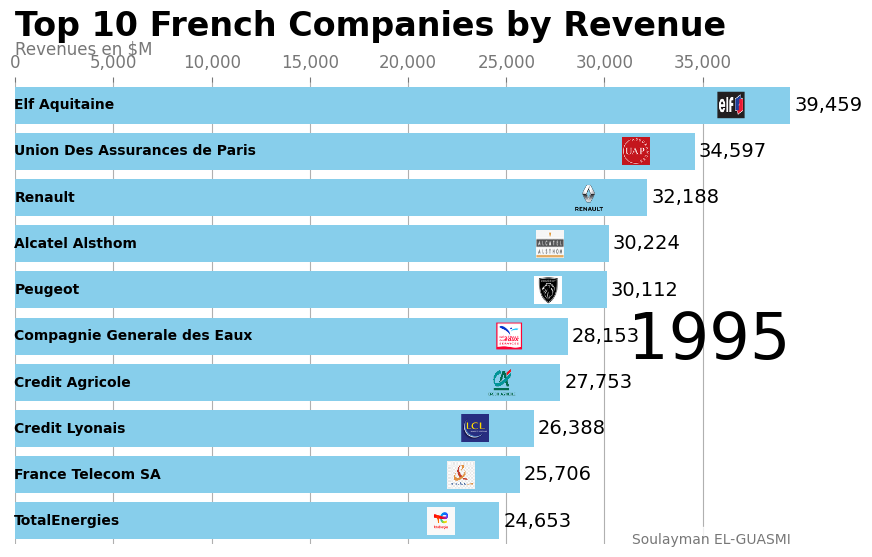

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.animation as animation

# Load the dataset
file_path = r'C:\Users\soula\Desktop\Projects\Race_chart\France_TOP10_Companies_1995_2023.csv'
data = pd.read_csv(file_path)

# Clean the 'Revenues ($M)' column
data['Revenues ($M)'] = data['Revenues ($M)'].str.replace(' ', '').str.replace(',', '').astype(float)

# Pivot the data
pivot_data = data.pivot(index='Year', columns='Name', values='Revenues ($M)')
pivot_data = pivot_data.fillna(0)

# Dictionary for logos
logos = {
    'Carrefour': 'Logos/Carrefour.png',
    'AXA': 'Logos/AXA.png',
    'TotalEnergies': 'Logos/TotalEnergies.png',
    'BNP Paribas': 'Logos/BNP_Paribas.png',
    'Renault': 'Logos/Renault.png',
    'Electricite de France': 'Logos/EDF.png',
    'Peugeot': 'Logos/Peugeot.png',
    'Engie': 'Logos/Engie.png',
    'Credit Agricole': 'Logos/Credit_Agricole.png',
    'Societe Generale': 'Logos/Societe_Generale.png',
    'Compagnie de Saint-Gobain': 'Logos/Compagnie_de_Saint_Gobain.png',
    'Suez': 'Logos/Suez.png',
    'Groupe Auchan': 'Logos/Groupe_Auchan.png',
    'Groupe BPCE': 'Logos/Groupe_BPCE.png',
    'Elf Aquitaine': 'Logos/Elf_Aquitaine.png',
    'Credit Agricole Group': 'Logos/Credit_Agricole.png',
    'Credit Nationale de Credit Agricole': 'Logos/Credit_Agricole.png',
    'CNP Assurances': 'Logos/CNP.png',
    'France Telecom SA': 'Logos/France_telecome.png',
    'Christian Dior': 'Logos/Christian_Dior.png',
    'GDF Suez SA': 'Logos/GDF_Suez_SA.png',
    'Veolia Environnement': 'Logos/Violia.png',
    'Total Fina Elf S.A.': 'Logos/TotalEnergies.png',
    'Vivendi Universal S.A.': 'Logos/Vivendi_uni.png',
    'Union Des Assurances de Paris': 'Logos/UAP.png',
    'Suez Lyonnaise des Eaux': 'Logos/Suez_eaux_Lyonaise.png',
    'Compagnie Generale des Eaux': 'Logos/Compagnie_Generale_des_Eaux.png',
    'Vinci': 'Logos/Vinci.png',
    'Orange': 'Logos/Orange.png',
    'Alcatel Alsthom': 'Logos/ALcatel_Alsthom.png',
    'Gan': 'Logos/Gan.png',
    'ELO Group': 'Logos/ELO.png',
    'PSA Peugeot Citroen S.A.': 'Logos/PSA.png',
    'Les Caisses d\'epargne et de Prevoyance': 'Logos/Caisse_d_epatgne.png',
    'Credit Lyonais': 'Logos/Credit_Lyonais.png'
}
# Function to add images to bars
def add_logo(ax, name, value, i):
    if name in logos:
        img = OffsetImage(plt.imread(logos[name]), zoom=0.4)
        ab = AnnotationBbox(img, (value-3000, i), frameon=False)
        ax.add_artist(ab)

fig, ax = plt.subplots(figsize=(10, 6))

def draw_barchart(year):
    ax.clear()
    dff = pivot_data.loc[year].sort_values(ascending=True).tail(10)
    ax.barh(dff.index, dff.values, color='skyblue')
    dx = dff.max() / 200
    
    for i, (value, name) in enumerate(zip(dff.values, dff.index)):
        ax.text(-50, i, f'{name}', size=10, weight=600, ha='left', va='center')  # Moved company names further to the left
        ax.text(value+dx, i, f'{value:,.0f}', size=14, ha='left', va='center')  # Moved revenue text further to the right
        add_logo(ax, name, value, i)  # Add logo

    ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')
    ax.text(0, 1.06, 'Revenues en $M', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.1, 'Top 10 French Companies by Revenue',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'Soulayman EL-GUASMI', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

# Create the animation
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1995, 2024), interval=500)

# Save the animation
animator.save('race_chart_with_icons_fixed.mp4')

# Display the animation in Jupyter Notebook
from IPython.display import Video
Video("race_chart_with_icons_fixed.mp4")
